# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Data Extraction

## 2.1 Load Data

In [3]:
# data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTyLIJ1fjJ4ur56F2PCzpopKHZ___w-jqjDVtky9kPVIQ5aQwb4-_dMRo5FE4IOxeLq4TR11syfYtWu/pub?gid=411004399&single=true&output=csv') # Publikasi CSV sudah saya hentikan
data = pd.read_csv('/content/drive/MyDrive/Perkuliahan/Lab/Data/ai4i2020.csv')

In [4]:
# Display basic information about the dataset
print("Data Information:")
print(data.info())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: fl

In [6]:
print("\nFirst few rows of the dataset:")
print(data.head())


First few rows of the dataset:
   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  


In [7]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


In [ ]:
# # Mengatasi nilai yang hilang di features dan target variable
# data.fillna(method='ffill', inplace=True)

# # Memastikan tidak ada NaN value di target variable
# if data['default'].isnull().sum() > 0:
#     data['default'].fillna(data['default'].mode()[0], inplace=True)

In [8]:
m = data.shape[0]
n = data.shape[1]
print('Number of rows: {}\nNumber of Columns: {}'.format(str(m),str(n)))

Number of rows: 10000
Number of Columns: 14


In [9]:
# Descriptive statistics
print("\nDescriptive statistics of the dataset:")
print(data.describe())


Descriptive statistics of the dataset:
               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.

In [46]:
X = data.drop(columns=['UDI', 'Product ID', 'TWF'])
y = data['TWF']

X = pd.get_dummies(X, drop_first=True)


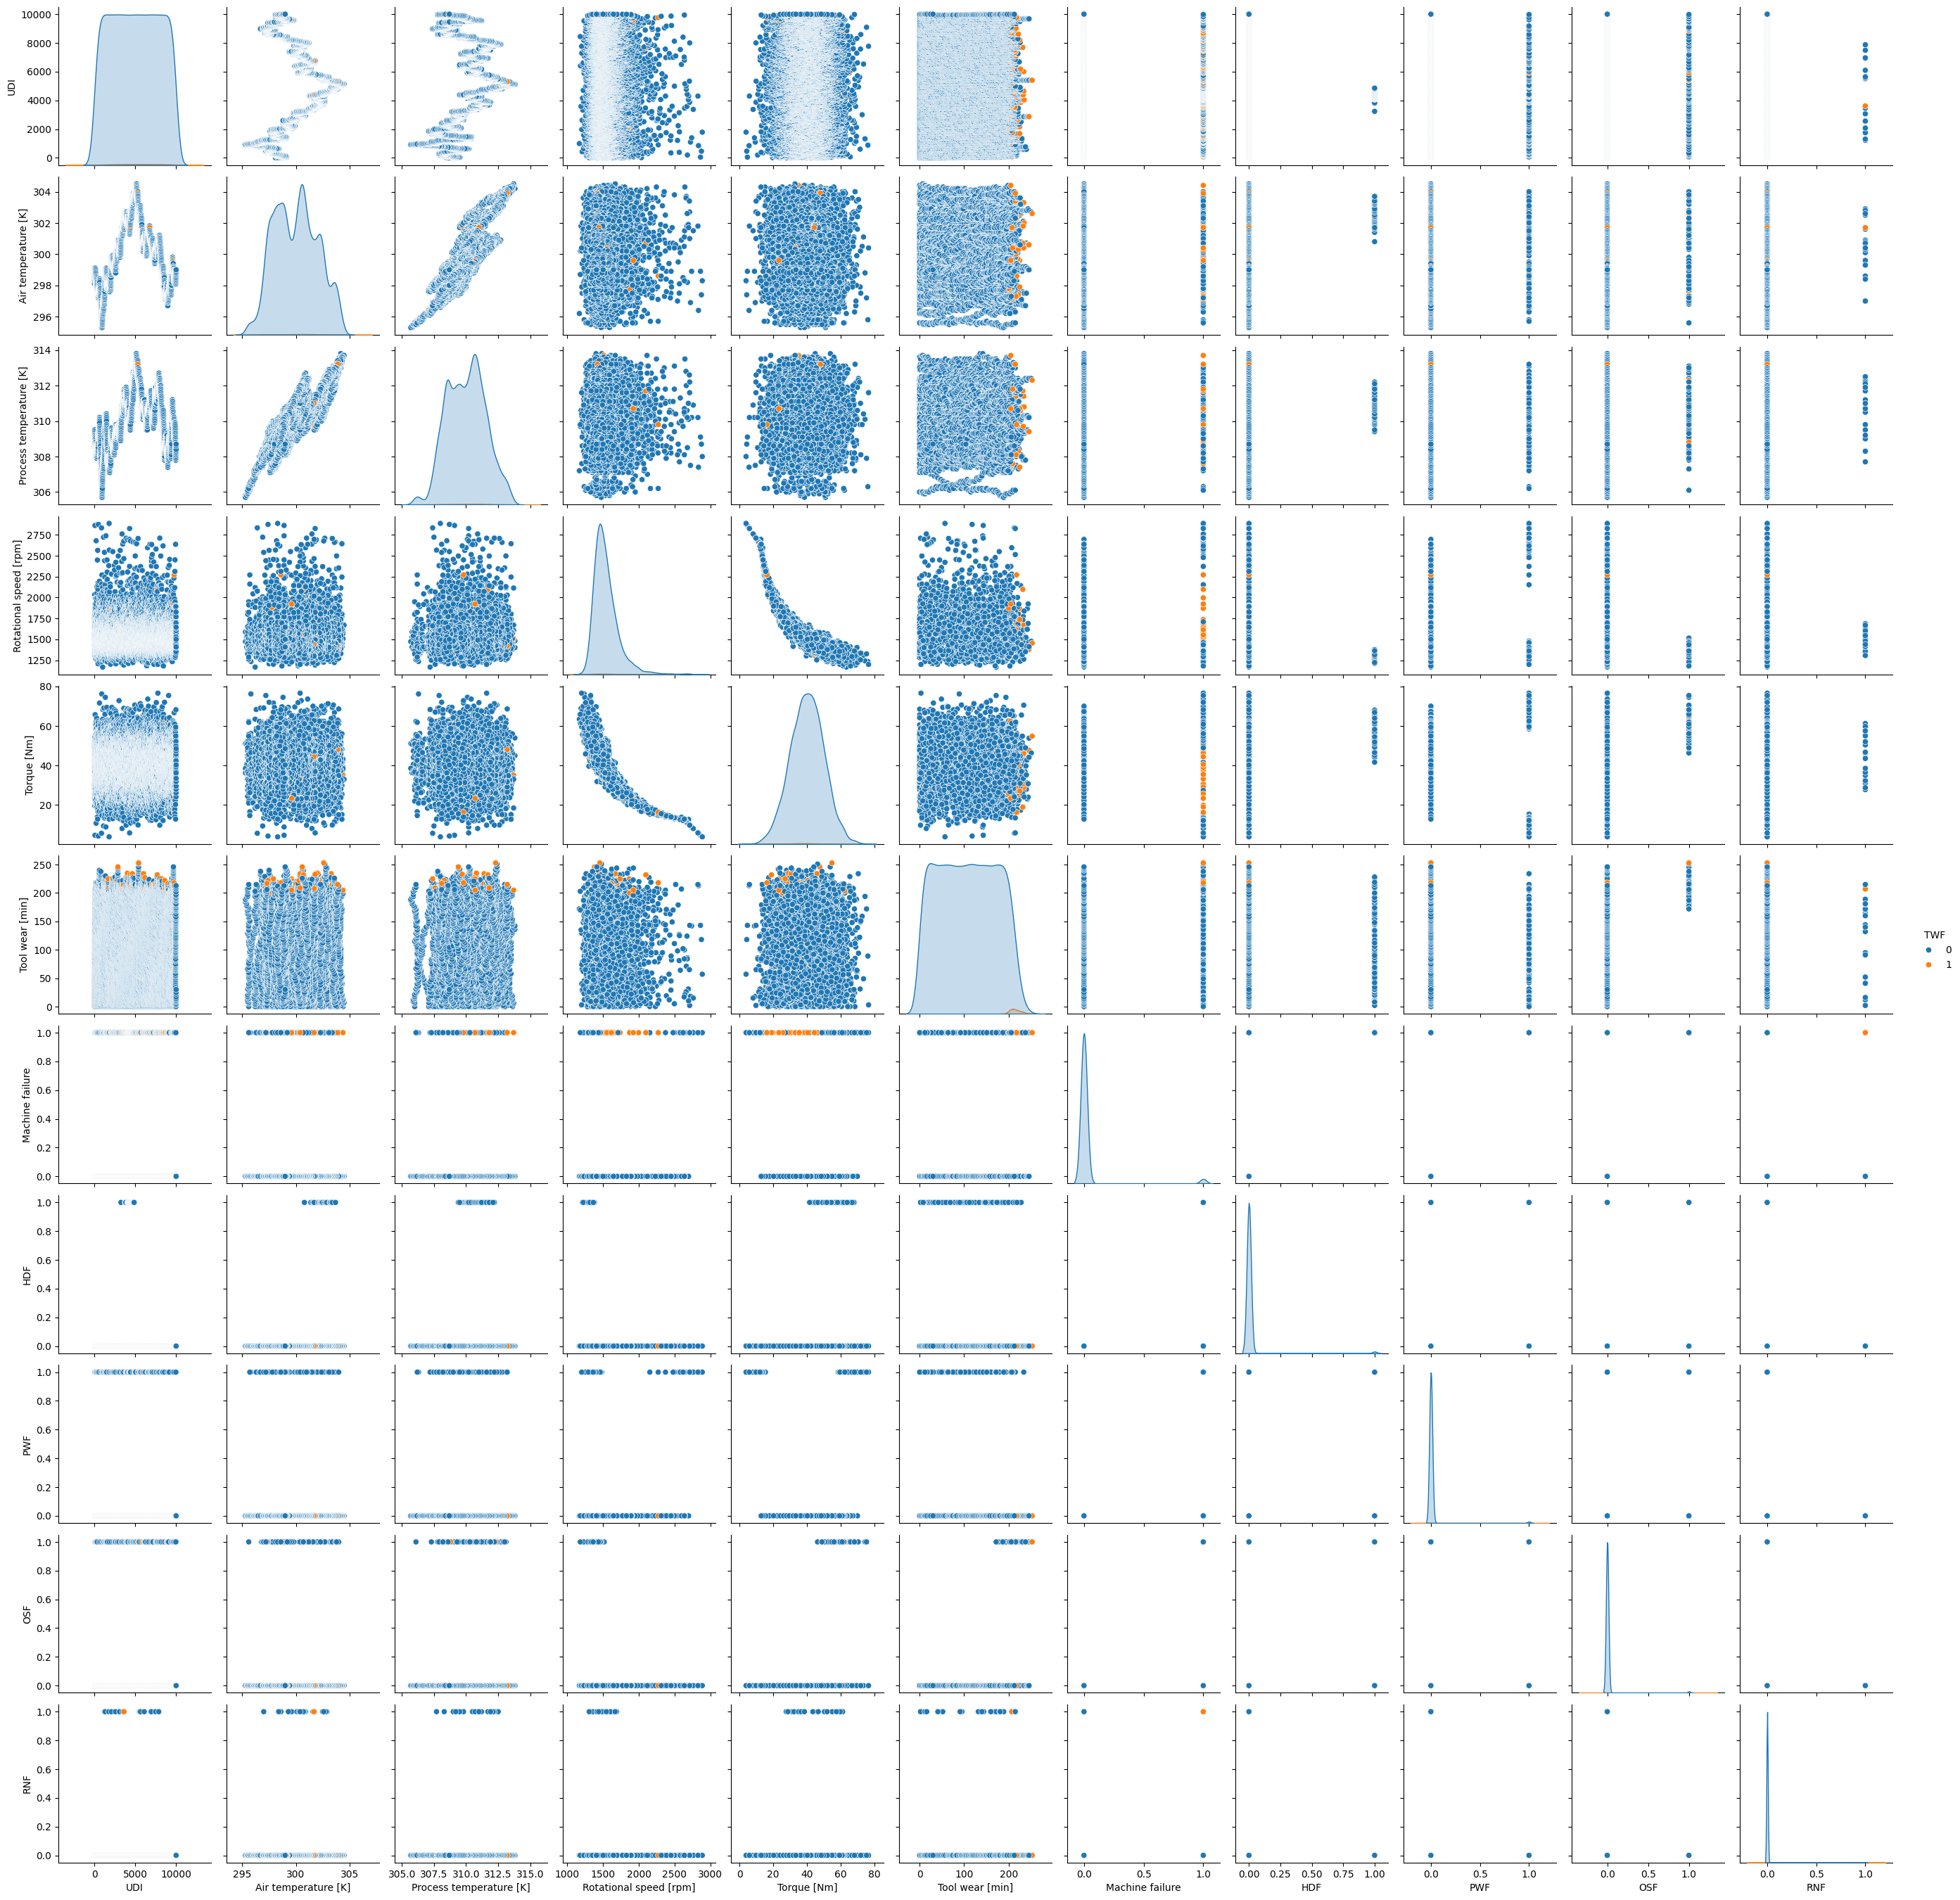

In [19]:
# Pair plot
sns.pairplot(data, hue='TWF')
plt.show()

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Building

In [21]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

In [22]:
# Make predictions
y_pred = clf.predict(X_test_scaled)

In [24]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1989    0]
 [   2    9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1989
           1       1.00      0.82      0.90        11

    accuracy                           1.00      2000
   macro avg       1.00      0.91      0.95      2000
weighted avg       1.00      1.00      1.00      2000



# Model Validation and Data Visualization

In [63]:
#  Testing Data
new_data = pd.DataFrame({
    'UDI': [100001],
    'Product ID': ['P1234'],
    'Type': ['L'],
    'Air temperature [K]': [330],
    'Process temperature [K]': [500],
    'Rotational speed [rpm]': [5000],
    'Torque [Nm]': [45],
    'Tool wear [min]': [2000],
    'Machine failure': [1],
    'TWF': [0],
    'HDF': [0],
    'PWF': [0],
    'OSF': [0],
    'RNF': [0]
})

# Convert categorical variables if any (using dummy variables)
new_data = pd.get_dummies(new_data)

# Align new_data with the training data
new_data = new_data.reindex(columns=X.columns, fill_value=0)

# Scale new data
new_data = scaler.transform(new_data)

# Make prediction
prediction = clf.predict(new_data)
print("Predicted Tool Wear Failure (TWF):", prediction)


Predicted Tool Wear Failure (TWF): [1]


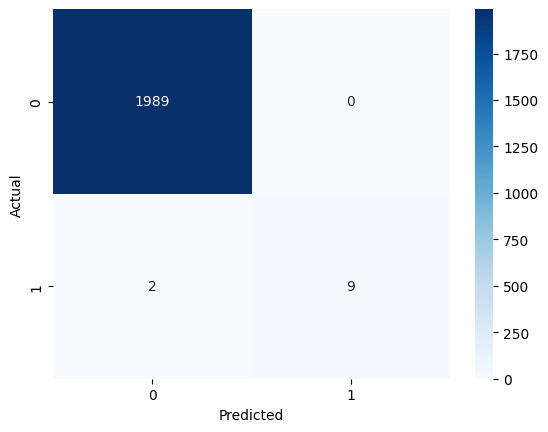

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1989
           1       1.00      0.82      0.90        11

    accuracy                           1.00      2000
   macro avg       1.00      0.91      0.95      2000
weighted avg       1.00      1.00      1.00      2000



In [37]:
# Predictions
y_pred = (clf.predict(X_test_scaled) > 0.5).astype("int32")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

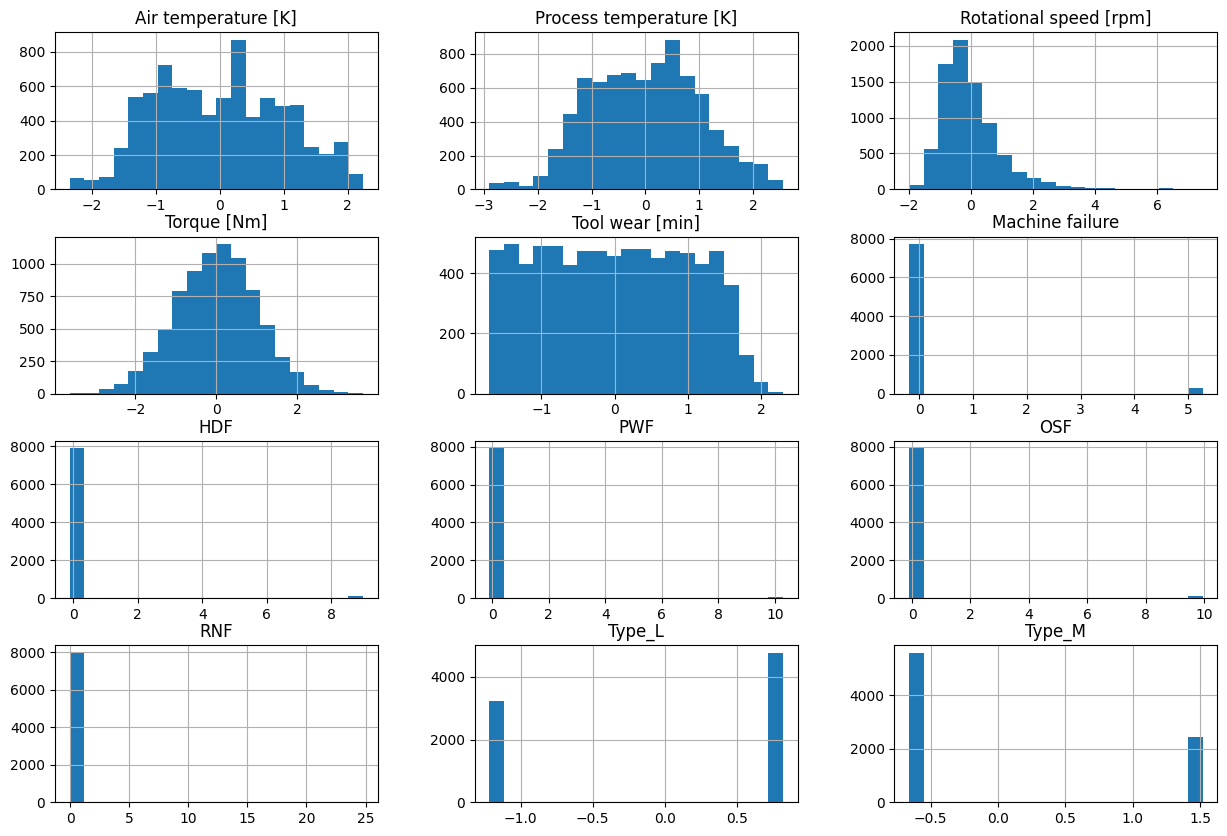

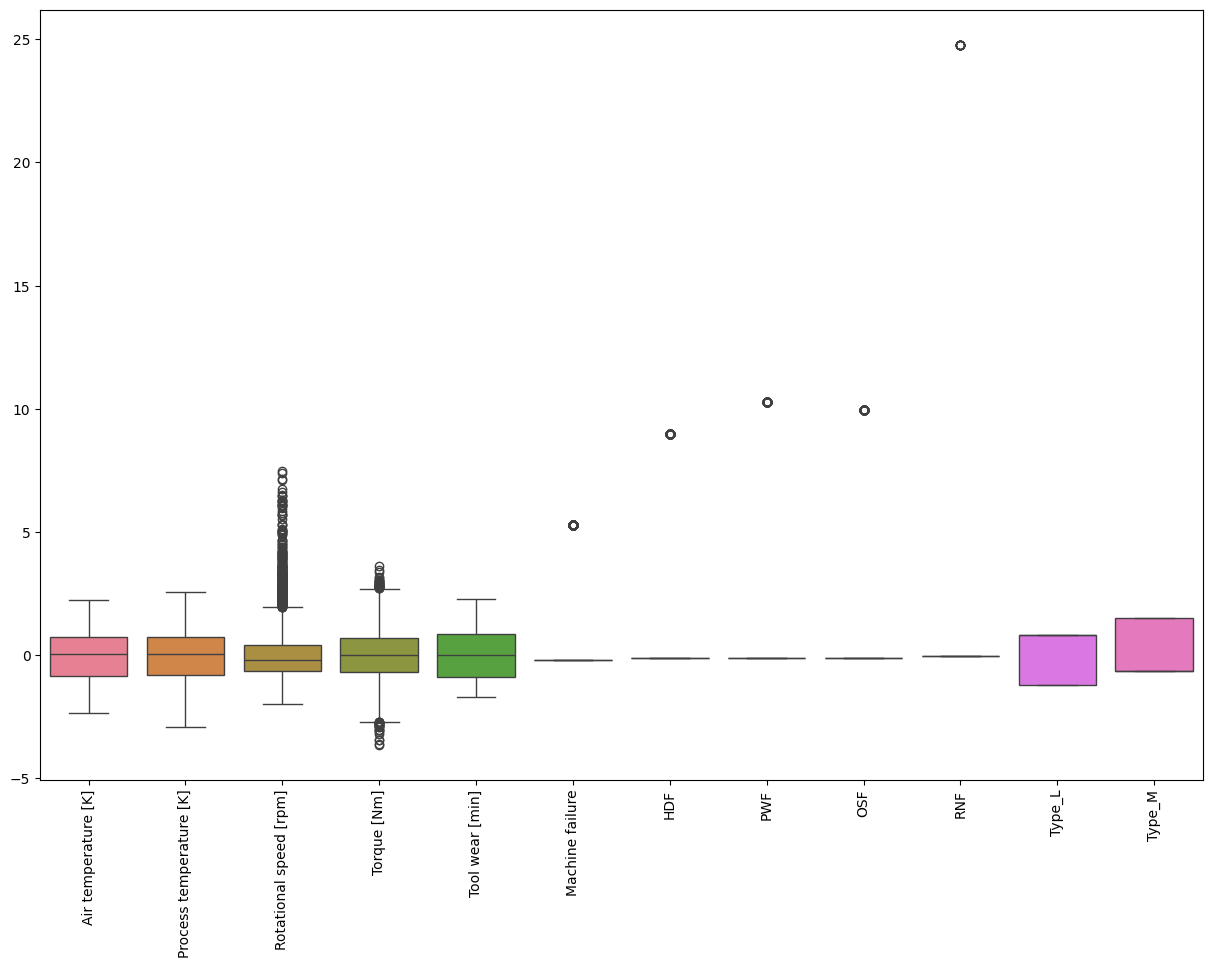

In [64]:
# Plot histograms for scaled features
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df.hist(bins=20, figsize=(15, 10))
plt.show()

# Box plots for scaled features
plt.figure(figsize=(15, 10))
sns.boxplot(data=X_train_scaled_df)
plt.xticks(rotation=90)
plt.show()

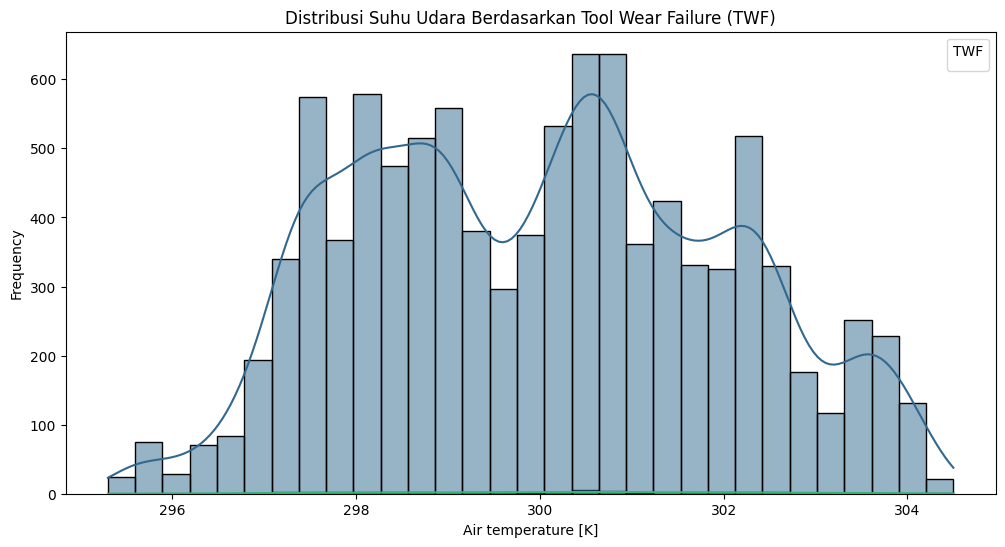

In [65]:
# Visualisasi distribusi suhu udara berdasarkan TWF
plt.figure(figsize=(12, 6))
sns.histplot(data, x='Air temperature [K]', hue='TWF', kde=True, palette='viridis')
plt.title('Distribusi Suhu Udara Berdasarkan Tool Wear Failure (TWF)')
plt.xlabel('Air temperature [K]')
plt.ylabel('Frequency')
plt.legend(title='TWF')
plt.show()

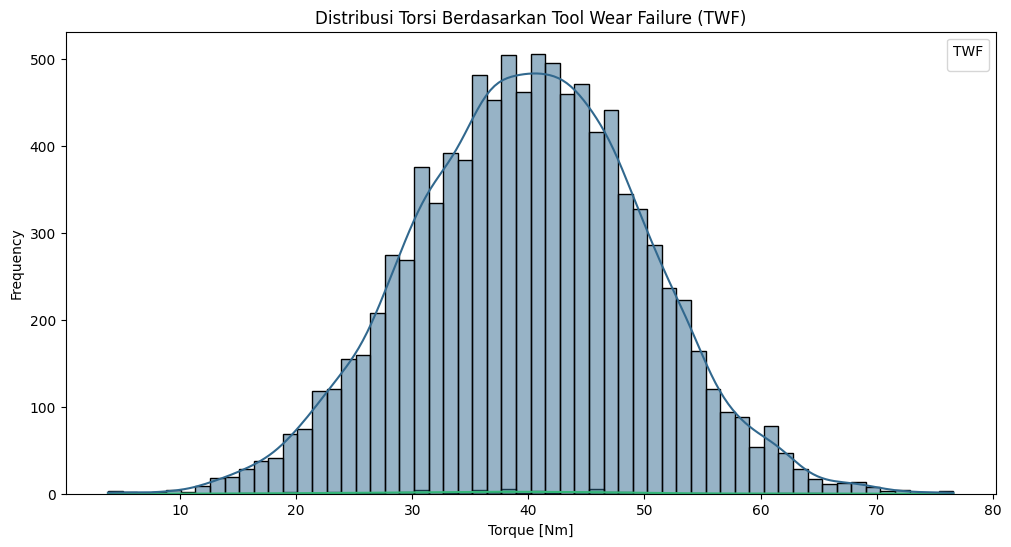

In [66]:
# Visualisasi distribusi torsi berdasarkan TWF
plt.figure(figsize=(12, 6))
sns.histplot(data, x='Torque [Nm]', hue='TWF', kde=True, palette='viridis')
plt.title('Distribusi Torsi Berdasarkan Tool Wear Failure (TWF)')
plt.xlabel('Torque [Nm]')
plt.ylabel('Frequency')
plt.legend(title='TWF')
plt.show()

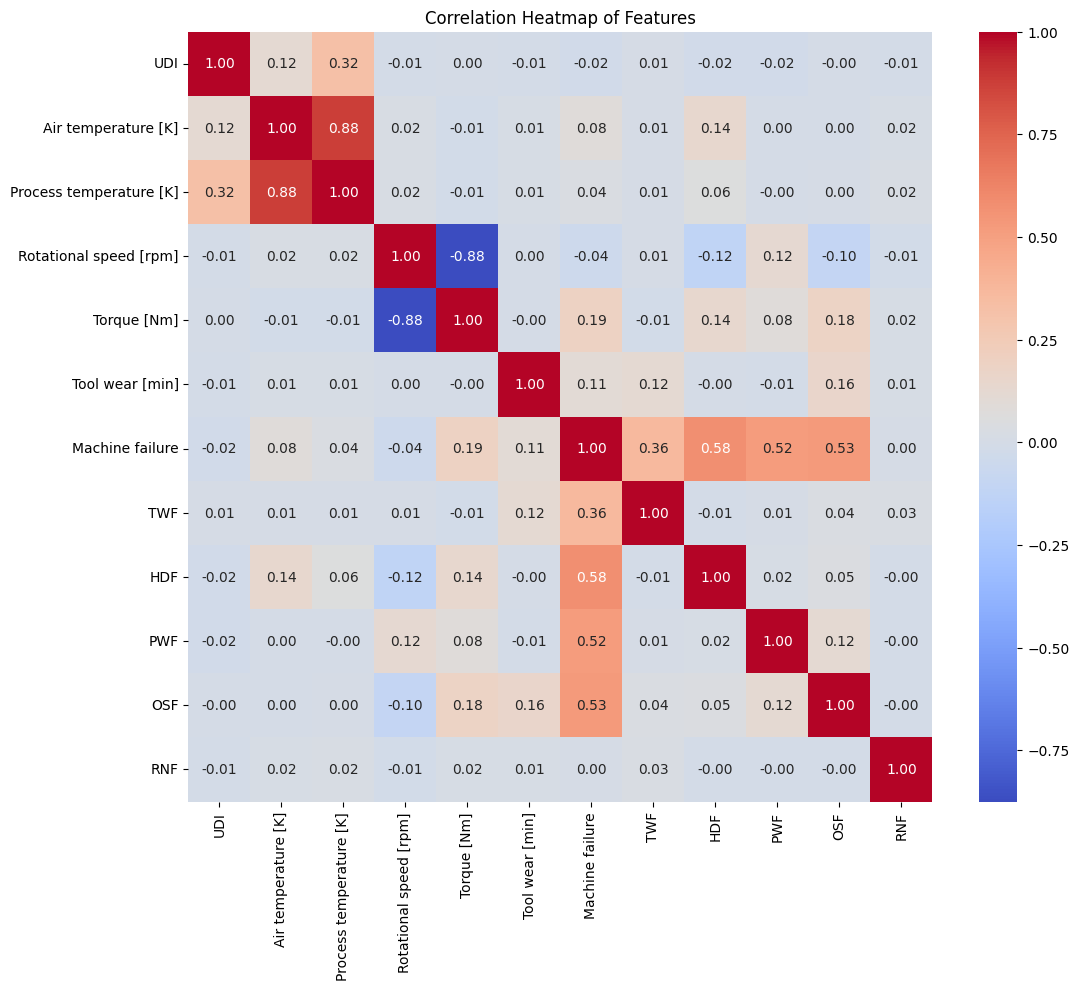

In [68]:
numeric_data = data.select_dtypes(include=[float, int])

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()